# COGS 108 - Investigation of Climate Policy's Impact on Carbon Emissions

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [ X ] NO - keep private

# Overview

*Fill in your overview here*
- Write a clear summary of what you did
- Briefly describe the results of your project
- Limit overview to 3-4 sentences

# Names

- Brandon Born
- Katherine Kim
- Karthik Guruvayurappan
- Evan Chen

<a id='research_question'></a>
# Research Question

What is the relationship between government policies and agreements and reduced global carbon emissions of countries from 1970 to 2018?

<a id='background'></a>

## Background & Prior Work

Climate change remains as a persisting, increasingly prevalent issue with the global temperature rising about 2.2 degrees Fahrenheit since the 1800s, ocean temperatures rising about 0.6 degrees Fahrenheit, sea level rise, shrinking ice caps which all have dramatic implications for our future (1). As a result, several climate policies across the globe have been introduced in order to mitigate and adapt to the effects of climate change (2). They take many forms, targeting a variety of different sectors, but with the immense contribution of emissions by human activity, it becomes a question of whether these policies are having tangible effects. 


Eskander and Fankhauser (2020) studied the impact of current cliamte policies on greenhouse gas emissions by looking at climate change legistlation in 133 countries over 18 years from 1999-2016 (3). They identified the statistical average effect of a new climate law on national emissions over the subsequent next 3 years (short-term) and after those 3 years (longer term) to build a "counterfactual time series of greenhouse gas emissions" with the "impact of climate change legistlation switched off" (3). As a result, Eskander and Fankhauser (2020) were able to derive carbon savings of about 38 GtCO2 or gigatonnes of carbon dioxide (3). While they claim this may look "modest," it has offset the carbon space we have left to cap global warming at 1.5 degrees Celcius (2). This means that there is a remaining carbon budget of about 420-770 GtCO2 (versus 382-732 GtCO2 without climate policy) suggesting that global response to climate change is not as limited as people think it is (3). 


Mulvaney with National Geographic analyzed the biggest emittors of emissions after their 2015 Paris Agreement where agreements were made to limit the increase of the global temperature average below 2 degrees Celcius (4). In 2017, there was still a 1.7% increase and 2.7% increase in 2018 (4). Mulvaney split countries based on their emission goals to limit warming to 1.5 degrees Celcius and seeing their current yearly emissions fit within that framework (4). Gambia, Morocco, and India remain "top of their class" whereas the US, Russia, and Saudia Arabia are categorized as "barely trying" with emissions far greater than the 1.5 mark (4). While these observations are only in reference to the Paris Agreements without consideration for smaller climate change legislations, they are highly indicative of, in general, countries having no change or an increase in carbon emissions despite legislation. 


References (include links):
- 1) https://climate.nasa.gov/evidence/
- 2) https://www.rff.org/publications/explainers/federal-climate-policy-101/
- 3) https://www.lse.ac.uk/granthaminstitute/news/the-impact-of-current-climate-policies-on-greenhouse-gas-emissions/#:~:text=The%20global%20response%20to%20climate,around%2038%20gigatonnes%20(Gt).
- 4) https://www.nationalgeographic.com/environment/article/climate-change-report-card-co2-emissions

# Hypothesis


Although the scope and number of climate policies passed by countries has risen in recent years, these policies have little to no effect on lowering global carbon emissions significantly.

# Datasets


- Dataset Name: EDGAR CO2 Emissions 1970-2018 Data
- Link to the dataset: https://github.com/openclimatedata/edgar-co2-emissions
- Number of observations: 50764
- This dataset includes observations from 1970 to 2018 of CO2 emissions by country and sector including building, power industry, transport, and other industrial combustion. 


- Dataset Name: Climate Policy Dataset 
- Link to the dataset: https://climatepolicydatabase.org/policies
- Number of observations: 5120
- This dataset contains observations of all climate policies by country, sector, its current status, decision year from as early as 1927, and policy type (e.g. Agricultural, energy service demand, energy efficiency). 


We are interested in looking at carbon emissions over time and seeing if there is a substantial change once a climate policy is implemented. Therefore, the EDGAR CO2 emissions data set offers us a continual set of data to see trends of emissions, and the Climate Policy Dataset can be combined to denote when policies were implemented and if carbon emissions decreased as a result. We can join the policy dataset with the carbon emissions data by year and country code, and then analyze the change in carbon emissions over time using these datasets. 

# Setup

In [3]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import geopandas as gpd
# Statmodels & patsy
import patsy
import statsmodels.api as sm

# Data Cleaning

Both the Edgar CO2 Emissions Dataset and Climate Policy Dataset are contained in a CSV file which means the data for both is in a semi-structured format. The data itself is already tidy. Each variable we are measuring is in a single column while every observation of a variable is in a different row resulting in rectangular data. All that is left is to clean the data. 

Our data cleaning steps include: 
- identifying any null values and dropping (when applicable) 
- checking the data for duplicate entries
- changing column names (when applicable)
- standardizing the responses (when applicable). 

### Climate Policy Dataset

In [73]:
# read in Climate Policy Dataset
climate_policy_data = pd.read_csv('./data/climate_policy_database_policies_export.csv')
climate_policy_data.head()

,Policy ID,Country ISO,Policy name,Policy Title,Jurisdiction,Supranational region,Country,Subnational region or state,City or local,Type of policy instrument,...,Start date of implementation,End date of implementation,High impact,Policy objective,Source or references,Impact indicators: comments,Impact indicators: name,Impact indicators: value,Impact indicators: base year,Impact indicators: target year
0,5244.0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,Country,NaN,United States of America,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,Mitigation,https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
1,5243.0,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Country,NaN,Bosnia and Herzegovina,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2020.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
2,5242.0,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,Country,NaN,"Macedonia, the former Yugoslav Republic of",NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
3,5241.0,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Country,NaN,Philippines,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
4,5240.0,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Country,NaN,Cape Verde,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN


In [74]:
# check dataset shape
climate_policy_data.shape

(5120, 26)

In [75]:
# check nan values across dataset
climate_policy_data.isna().sum()

Policy ID                            1
Country ISO                          0
Policy name                          0
Policy Title                         0
Jurisdiction                       406
Supranational region              4935
Country                              0
Subnational region or state       4982
City or local                     5082
Type of policy instrument          424
Sector name                        421
Policy description                1825
Policy type                        496
Policy stringency                 5014
Implementation state               425
Date of decision                   132
Start date of implementation      4557
End date of implementation        4385
High impact                        530
Policy objective                    60
Source or references               143
Impact indicators: comments       4759
Impact indicators: name           4716
Impact indicators: value          4716
Impact indicators: base year      4829
Impact indicators: target

In [76]:
# list columns from dataset
climate_policy_data.columns

Index(['Policy ID', 'Country ISO', 'Policy name', 'Policy Title',
       'Jurisdiction', 'Supranational region', 'Country',
       'Subnational region or state', 'City or local',
       'Type of policy instrument', 'Sector name', 'Policy description',
       'Policy type', 'Policy stringency', 'Implementation state',
       'Date of decision', 'Start date of implementation',
       'End date of implementation', 'High impact', 'Policy objective',
       'Source or references', 'Impact indicators: comments',
       'Impact indicators: name', 'Impact indicators: value',
       'Impact indicators: base year', 'Impact indicators: target year'],
      dtype='object')

In [77]:
# select necessary columns from the dataset
climate_policy_data = climate_policy_data[['Country ISO', 'Policy name', 'Policy Title', 'Country', 
                                           'Sector name', 'Policy type', 'Date of decision', 
                                           'Policy objective']]

In [78]:
# analyze nans from dataset
climate_policy_data.isna().sum()

Country ISO           0
Policy name           0
Policy Title          0
Country               0
Sector name         421
Policy type         496
Date of decision    132
Policy objective     60
dtype: int64

In [79]:
# drop nan values for necesary columns for analysis
(climate_policy_data['Date of decision'].isna()).sum()

132

In [83]:
climate_policy_data = climate_policy_data.dropna(axis=0, subset=['Date of decision'])
climate_policy_data.head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,United States of America,General,"Energy efficiency, Energy service demand reduc...",2021.0,Mitigation
1,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Bosnia and Herzegovina,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
2,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,"Macedonia, the former Yugoslav Republic of",General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
3,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Philippines,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
4,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Cape Verde,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"


In [84]:
# check missingness of data
climate_policy_data.isna().sum()

Country ISO           0
Policy name           0
Policy Title          0
Country               0
Sector name         421
Policy type         493
Date of decision      0
Policy objective     60
dtype: int64

In [85]:
# get unique countries
climate_policy_data['Country ISO'].unique()

array(['USA', 'BIH', 'MKD', 'PHL', 'CPV', 'VUT', 'BRA', 'VNM', 'UKR',
       'THA', 'ZAF', 'RUS', 'MAR', 'MEX', 'JPN', 'IDN', 'EUE', 'ETH',
       'COL', 'CHN', 'CAN', 'AUS', 'ARG', 'PYF', 'AND', 'MCO', 'GBR',
       'NOR', 'CHE', 'MDA', 'NZL', 'FJI', 'MHL', 'TON', 'PNG', 'BRN',
       'KOR', 'KHM', 'SGP', 'MNG', 'KGZ', 'PRK', 'ECU', 'SYR', 'BGD',
       'NPL', 'MDV', 'AGO', 'LBN', 'ARE', 'SSD', 'KEN', 'RWA', 'ZMB',
       'GRD', 'ISL', 'CHL', 'PER', 'SEN', 'SUR', 'CRI', 'PAN', 'NIC',
       'JAM', 'DOM', 'CMR', 'GRC', 'SWE', 'IND', 'FRA', 'ESP', 'ITA',
       'SAU', 'SDN', 'DNK', 'BEL', 'DEU', 'LKA', 'BGR', 'TUR', 'UZB',
       'SLB', 'NLD', 'TGO', 'LUX', 'COD', 'FIN', 'TUN', 'SVK', 'GMB',
       'MNE', 'URY', 'TLS', 'TZA', 'IRQ', 'ISR', 'PRY', 'NGA', 'BEN',
       'AFG', 'ERI', 'NRU', 'NAM', 'MOZ', 'FSM', 'ZWE', 'STP', 'GAB',
       'GHA', 'GEO', 'GUY', 'GTM', 'GNB', 'GNQ', 'GIN', 'HTI', 'COK',
       'CIV', 'NER', 'MUS', 'MRT', 'NIU', 'MLI', 'MYS', 'MWI', 'MDG',
       'LIE', 'LBR',

In [86]:
# ensure there is a one to one mapping between Country ISO and Country
print(climate_policy_data['Country ISO'].nunique())
print(climate_policy_data['Country'].nunique())

194
194


In [87]:
# analyze sector name data
climate_policy_data['Sector name'].value_counts()

General                                                                                                                                                        979
Electricity and heat, Renewables                                                                                                                               693
Electricity and heat                                                                                                                                           288
Transport                                                                                                                                                      243
Buildings                                                                                                                                                      206
                                                                                                                                                              ... 
Electricity and heat, 

In [88]:
# check data types
climate_policy_data.dtypes

Country ISO          object
Policy name          object
Policy Title         object
Country              object
Sector name          object
Policy type          object
Date of decision    float64
Policy objective     object
dtype: object

In [89]:
# check data shape
climate_policy_data.shape

(4988, 8)

### Edgar CO2 Dataset

The following is the code used to clean and briefly explore the Edgar CO2 dataset. 

In [90]:
#Reads in dataset from where it was saved in datahub
#For the Edgar CO2 emissions dataset
df = pd.read_csv('https://raw.githubusercontent.com/openclimatedata/edgar-co2-emissions/master/data/edgar-co2-emissions.csv')
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


In [91]:
# Check for null values, only null values appear in emissions column
df.isna().any()

Code         False
Name         False
Sector       False
Year         False
Emissions     True
dtype: bool

In [92]:
# number of null/missing values in Emissions column
df['Emissions'].isnull().sum()

387

In [93]:
#Seeing the total emissions by country in order to see if the null values affect calculations, which they don’t so we will keep the null values in the dataset
df.groupby('Name').agg('sum').sort_values(by='Emissions', ascending=False)['Emissions']

Name
United States                                   256355.650474
China                                           215491.859571
Russia                                           85982.870481
Japan                                            55297.538635
Germany                                          46955.011838
                                                    ...      
Kiribati                                             1.309827
Falkland Islands                                     0.743025
Anguilla                                             0.583611
Saint Helena, Ascension and Tristan da Cunha         0.336218
Faroes                                               0.074013
Name: Emissions, Length: 210, dtype: float64

In [94]:
# No duplicate rows
df.duplicated().any()

False

In [95]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


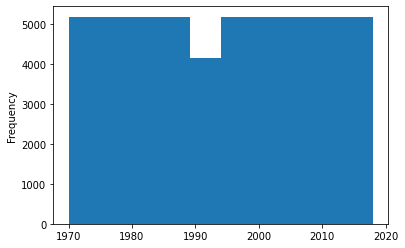

In [97]:
# check distribution of years
df['Year'].plot(kind='hist');

In [98]:
# check distribution of countries
df['Code'].unique()

array(['AFG', 'ALB', 'DZA', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FJI', 'FIN', 'FRA_MCO', 'GUF', 'PYF', 'GAB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR_PSE', 'ITA_SMR_VAT', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR',
       'MOZ

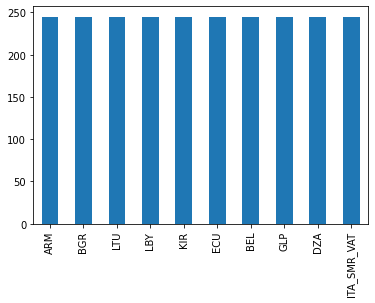

In [100]:
df['Code'].value_counts().nlargest(10).plot(kind='bar');

In [101]:
# ensure one to one mapping between country names and codes
print(df['Name'].nunique())
print(df['Code'].nunique())

210
210


In [102]:
# check sector value counts
df['Sector'].value_counts()

Transport                      10241
Other sectors                  10192
Power Industry                 10143
Other industrial combustion    10094
Buildings                      10094
Name: Sector, dtype: int64

# Data Analysis & Results

## EDA

### Climate Policy Dataset

**Structure**: This dataset is a single table stored in a csv format (tabular, semi-structured data), and has 4754 unique observations with 8 variables (columns).

In [103]:
# view the shape of the climate data
climate_policy_data.shape

(4988, 8)

**Granularity**: Each observation in this dataframe represents a climate policy passed by a national government.

In [104]:
# preview dataframe to understand the granularity
climate_policy_data.head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,United States of America,General,"Energy efficiency, Energy service demand reduc...",2021.0,Mitigation
1,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Bosnia and Herzegovina,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
2,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,"Macedonia, the former Yugoslav Republic of",General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
3,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Philippines,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"
4,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Cape Verde,General,"Energy efficiency, Energy service demand reduc...",2021.0,"Adaptation, Mitigation"


**Scope**: Overall, the data is mostly complete, but has some missingness in the sector name, policy type, and policy objective columns. It seems that missingness occurs more in more general policies and is related to the other columns with missingness, but there is also some randomness in the missingness. The only quantitative variable is the date of decision, which based on descriptive statistics and a histogram, appears to have a left-skewed distribution. There are 98 outlier years, but these outliers should remain in the dataset since they are only outliers due to an increasing amount of recent climate policies. A barplot of the 20 countries with the most climate policies passed reveals that the United States passes the most climate policies, with roughly 425 policies passed. 

**Temporality**: The left-skewed distribution of decision dates indicates more policies in recent years. This is likely due to increasing awareness surrounding climate change in recent years. The data are presented on a year level, beginning around 1930 and ranging all the way into the present (2021).

In [105]:
# summarize data missingness
climate_policy_data.isna().sum()

Country ISO           0
Policy name           0
Policy Title          0
Country               0
Sector name         421
Policy type         493
Date of decision      0
Policy objective     60
dtype: int64

In [106]:
# analyze sector name missingness
climate_policy_data[climate_policy_data['Sector name'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
100,CMR,Creation of the Steering Committee for activit...,Creation of the Steering Committee for activit...,Cameroon,NaN,NaN,2012.0,Mitigation
101,GRC,Compensation to carbon intensive industries (s...,Compensation to carbon intensive industries (s...,Greece,NaN,NaN,2014.0,Mitigation
429,ESP,Resolution of 10 April 2017 of the State Secre...,Resolution of the State Secretary of Energy,Spain,NaN,Renewables,2017.0,Mitigation
626,UZB,Resolution on Further Development of Renewable...,Resolution on Further Development of Renewable...,Uzbekistan,NaN,Renewables,2016.0,Mitigation
813,ESP,FNEE: Aid Programme for Desalination Plants Sp...,FNEE: Aid Programme for Desalination Plants,Spain,NaN,Energy efficiency,2015.0,Mitigation


In [107]:
# analyze policy type missingness
climate_policy_data[climate_policy_data['Policy type'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
100,CMR,Creation of the Steering Committee for activit...,Creation of the Steering Committee for activit...,Cameroon,NaN,NaN,2012.0,Mitigation
101,GRC,Compensation to carbon intensive industries (s...,Compensation to carbon intensive industries (s...,Greece,NaN,NaN,2014.0,Mitigation
131,CRI,Intersectoral agreement to reduce emissions in...,Intersectoral agreement to reduce emissions in...,Costa Rica,Transport,NaN,2019.0,"Mitigation, Energy access"
152,DNK,Climate Act Denmark (2019),Climate Act,Denmark,General,NaN,2019.0,Mitigation
167,SWE,Ordinance (2019:525) on State Aid for the Inst...,Ordinance (2019:525) on State Aid for the Inst...,Sweden,"Transport, Low-emissions mobility",NaN,2019.0,Mitigation


In [108]:
# analyze policy objective missingness
climate_policy_data[climate_policy_data['Policy objective'].isna()].head()

,Country ISO,Policy name,Policy Title,Country,Sector name,Policy type,Date of decision,Policy objective
18,ZAF,Biofuels Regulatory Framework (BRF) to impleme...,Biofuels Regulatory Framework (BRF) to impleme...,South Africa,Transport,Renewables,2020.0,NaN
35,COL,Non-conventional renewable energy auction Colo...,Non-conventional renewable energy auction,Colombia,"Electricity and heat, Renewables",Renewables,2019.0,NaN
130,ARG,Grid expansion tenders Argentina (2019),Grid expansion tenders,Argentina,Electricity and heat,Renewables,2019.0,NaN
138,USA,Affordable Clean Energy (ACE) United States of...,Affordable Clean Energy (ACE),United States of America,"Electricity and heat, Coal",Energy efficiency,2019.0,NaN
198,CAN,Amendment 14 - Energy Efficiency Regulations -...,Amendment 14 - Energy Efficiency Regulations -...,Canada,"Buildings, Appliances",Energy efficiency,2019.0,NaN


In [109]:
# preview descriptive statistics (for date of decision only)
climate_policy_data.describe()

,Date of decision
count,4988.000000
mean,2008.106055
std,8.012659
min,1927.000000
25%,2004.000000
50%,2009.000000
75%,2014.000000
max,2021.000000


In [110]:
# count outliers in year
iqr = 2014-2004
lower_bound = 2004 - 1.5 * iqr 
upper_bound = 2014 + 1.5 * iqr
((climate_policy_data['Date of decision'] > upper_bound) | (climate_policy_data['Date of decision'] < lower_bound)).sum()

98

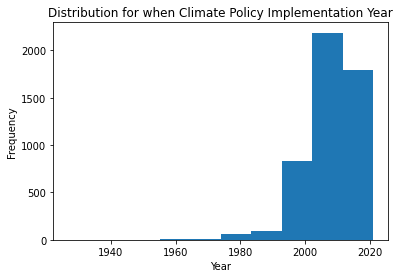

In [111]:
# generate plot of years to analyze values
ax = climate_policy_data['Date of decision'].plot(kind='hist');
ax.set_xlabel("Year")
ax.set_title("Distribution for when Climate Policy Implementation Year");

The distribution of years is left-skewed, with more policies in more recent years, likely reflective of increasing awareness of climate change.

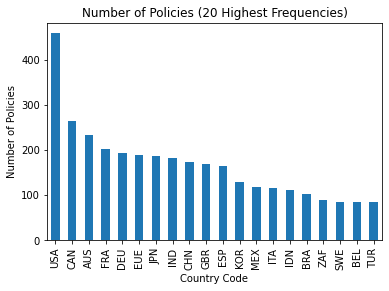

In [112]:
# generate plot of top countries to analyze values
ax = climate_policy_data['Country ISO'].value_counts().nlargest(20).plot(kind='bar');
ax.set_xlabel("Country Code")
ax.set_ylabel("Number of Policies")
ax.set_title("Number of Policies (20 Highest Frequencies)");

The United States has the most climate policies passed, just over 400 policies. The 20 countries with the most policies all have roughly 100 policies or more.

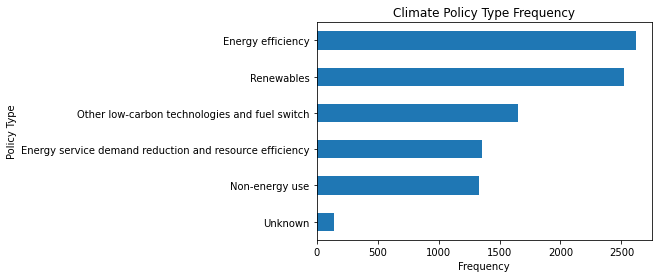

In [117]:
# plot distribution of policy types
ax = pd.Series(climate_policy_data['Policy type'].str.split(', ').dropna()
               .sum()).value_counts(ascending=True).plot(kind='barh');
ax.set_xlabel("Frequency")
ax.set_ylabel("Policy Type")
ax.set_title("Climate Policy Type Frequency");

The two most common types of policy types are energy efficiency and renewables.

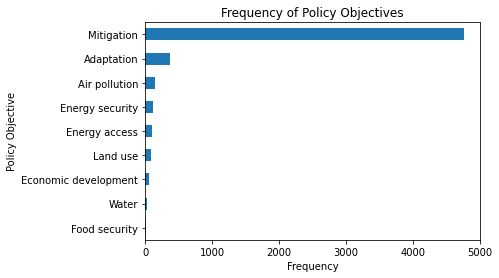

In [115]:
# plot distribution of policy objective
ax = pd.Series(climate_policy_data['Policy objective'].str.split(', ').dropna()
               .sum()).value_counts(ascending=True).plot(kind='barh');
ax.set_xlabel("Frequency")
ax.set_ylabel("Policy Objective")
ax.set_title("Frequency of Policy Objectives");

The most common policy objective is mitigation by far.

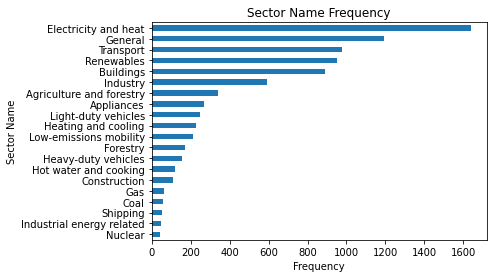

In [116]:
# plot distribution of sectors
ax = pd.Series(climate_policy_data['Sector name'].str.split(', ').dropna()
               .sum()).value_counts(ascending=True).nlargest(20).sort_values(ascending=True).plot(kind='barh');
ax.set_xlabel("Frequency")
ax.set_ylabel("Sector Name")
ax.set_title("Sector Name Frequency");

The five most common sectors are electricity and heat, general, transport, renewables, and buildings.

**Faithfulness**: This dataset is collected, updated, and maintained by the NewClimateInstitute and keeps track of all mitigation policies passed towards climate change. This is a reliable data source. However, since the data is only updated periodically, the specific CSV file used in this analysis might be a little bit out of date. 

### Edgar CO2 Dataset

In [118]:
df.columns

Index(['Code', 'Name', 'Sector', 'Year', 'Emissions'], dtype='object')

**Structure of the Edgar CO2 emissions dataset:** tabular data with individual observations in rows and variables in columns


Therefore, we do not necessarily need to change the way the data is stored. 

In [119]:
df.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430


**Granularity of Edgar CO2 emissions dataset:** group-level over time 

In [120]:
print('(rows, columns):',(df.shape))
print('Number of countries in dataset:',(df['Code'].nunique()))

(rows, columns): (50764, 5)
Number of countries in dataset: 210


**Scope of Edgar CO2 emissions dataset:** According to Google and the ISO Country Code standards, there are 249 countries in the world with 194 of them being independent. Therefore, our data has a relatively large scope. Although we cannot definitively say that we can understand all CO2 emissions from every country using this data, the scope of our question is still relevant. 

In [121]:
print('Number of years:',(df['Year'].nunique()))
print('Start year:',(df['Year'][0]))
print('End year:',(df['Year'][len(df)-1]))

Number of years: 49
Start year: 1970
End year: 2018


**Temporality of Edgar CO2 emissions dataset:** We have data about CO2 emissions from 1970 to 2018 about 210 countries. 

**Faithfulness of Edgar CO2 emissions dataset:** Our data comes from EDGAR, the Emissions Database for Global Atmospheric Research. According to EDGAR's website, they provide independent emission data estimates regardless of what individual countries reported or by the UNFCCC, the United Nationals Framework Convention on Climate Change, using a consistent methodology. We can say that our data is accurate as each observation is not self-reported and is collected in a systematic fashion. 

In [122]:
# Checking if there is 49 observations for each country from each sector 
# grouping sectors to see if each has 49 observations 

all(df.groupby('Code').Sector.value_counts().eq(49))

True

We now will explore countries with the highest and lowest emissions.

In [124]:
#creating a dataframe of the countries with the highest emissions from 1970-2018 
#also creating a separate dataframe of countries with the very low emissions 
df_highest = df[df['Emissions'] >= 500]
df_lowest = df[df['Emissions'] <= 1]

In [125]:
# preview highest emissions data frame
df_highest.head()

,Code,Name,Sector,Year,Emissions
152,RUS,Russia,Power Industry,1970,508.338492
197,USA,United States,Power Industry,1970,1079.968842
403,USA,United States,Buildings,1970,883.543122
610,USA,United States,Transport,1970,1039.772133
816,USA,United States,Other industrial combustion,1970,1397.918113


In [126]:
# preview lowest emissions data frame
df_lowest.head()

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430
5,ATG,Antigua and Barbuda,Power Industry,1970,0.053822


**Scope of lowest emissions dataframe:** This dataframe contains 25,436 instances of countries with emission levels of 1 million metric tons per year (Mt) or below in a given year, which is a substantially larger portion of the original dataset. 

This can also be noted through using the describe method on the dataframe as the average emissions is very low at 24.5 Mt, while the max is around 4585 Mt.

In [128]:
df.describe()

,Year,Emissions
count,50764.000000,5.037700e+04
mean,1994.000000,2.448694e+01
std,14.142275,1.352670e+02
min,1970.000000,1.931770e-07
25%,1982.000000,8.864667e-02
50%,1994.000000,9.520414e-01
75%,2006.000000,8.277985e+00
max,2018.000000,4.585523e+03


**Visualizing highest emissions data**

In [139]:
# preview data sorted by country and year
df.sort_values(by=['Code', 'Year']).head(10)

,Code,Name,Sector,Year,Emissions
8,ABW,Aruba,Power Industry,1970,0.008970
215,ABW,Aruba,Buildings,1970,0.009611
421,ABW,Aruba,Transport,1970,0.001129
628,ABW,Aruba,Other industrial combustion,1970,0.000123
834,ABW,Aruba,Other sectors,1970,0.001460
1044,ABW,Aruba,Power Industry,1971,0.008970
1251,ABW,Aruba,Buildings,1971,0.009611
1457,ABW,Aruba,Transport,1971,0.001129
1664,ABW,Aruba,Other industrial combustion,1971,0.000123
1870,ABW,Aruba,Other sectors,1971,0.001473


In this dataset, for every country in a given year, the emissions provided are broken down by sector. Therefore, to visualize the highest emissions data, we need to aggregate across the sectors to get values for each country. 

In [148]:
# group data by code and year
country_year_emissions = pd.DataFrame(df.groupby(['Code', 'Year'])['Emissions'].aggregate(np.sum))
country_year_emissions.head(10)

Emissions
Code Year           
ABW  1970   0.021293
     1971   0.021306
     1972   0.024495
     1973   0.026774
     1974   0.022339
     1975   0.027893
     1976   0.024798
     1977   0.027307
     1978   0.028253
     1979   0.026614

In [149]:
# reset index on the grouped data
country_year_emissions = country_year_emissions.reset_index()
country_year_emissions.head()

,Code,Year,Emissions
0,ABW,1970,0.021293
1,ABW,1971,0.021306
2,ABW,1972,0.024495
3,ABW,1973,0.026774
4,ABW,1974,0.022339


In [155]:
# get 5 countries with the largest total emissions across the dataset
top_total_emissions = country_year_emissions.groupby('Code')['Emissions'].aggregate(np.sum).nlargest(5)
top_total_emissions

Code
USA    256355.650474
CHN    215491.859571
RUS     85982.870481
JPN     55297.538635
DEU     46955.011838
Name: Emissions, dtype: float64

In [158]:
# store the country names of the top 5 countries
top_five_countries = list(top_total_emissions.index)
top_five_countries

['USA', 'CHN', 'RUS', 'JPN', 'DEU']

In [163]:
# filter the grouped dataframe for the top 5 countries
top_five_emissions_df = country_year_emissions[country_year_emissions['Code'].isin(top_five_countries)]
top_five_emissions_df.head()

,Code,Year,Emissions
1715,CHN,1970,905.871699
1716,CHN,1971,909.657767
1717,CHN,1972,970.674022
1718,CHN,1973,1011.185712
1719,CHN,1974,1029.343699


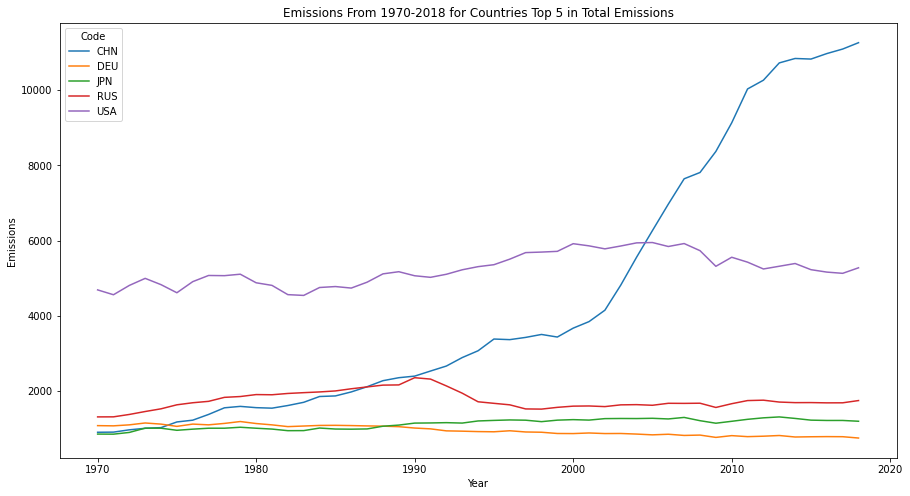

In [181]:
# plot the emissions over time for the top 5 countries
plt.figure(figsize=(15, 8))
(sns.lineplot(data=top_five_emissions_df, x='Year', y='Emissions', hue='Code')
 .set_title('Emissions From 1970-2018 for Countries Top 5 in Total Emissions'));

Overall, the top 5 countries seem to have been relatively constant in emissions between 1970 and 2018, with the exception of CHN (China), which has shown a rapid increase. These constant trends in the emissions of the top 5 countries may potentially be the result of climate change policies. 

**Grouping and Visualizing Better Off or Worse Off Countries**

Let's check which countries are better off or worse in 2018 in comparison to 1970 in terms of emissions.

In [180]:
df

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
1,ALB,Albania,Power Industry,1970,0.600624
2,DZA,Algeria,Power Industry,1970,1.645869
3,AGO,Angola,Power Industry,1970,0.137546
4,AIA,Anguilla,Power Industry,1970,0.000430
...,...,...,...,...,...
50759,YEM,Yemen,Other sectors,2018,2.576755
50760,ZMB,Zambia,Other sectors,2018,1.765269
50761,ZWE,Zimbabwe,Other sectors,2018,1.300813
50762,AIR,International Aviation,Transport,2018,564.612452


Looking at AFG (Afghanistan) for example, we know that there are 5 sectors for a particular country in one year.

In [50]:
df[(df['Code'] == 'AFG') & (df['Year'] ==  1970)]

,Code,Name,Sector,Year,Emissions
0,AFG,Afghanistan,Power Industry,1970,0.056962
207,AFG,Afghanistan,Buildings,1970,0.577234
413,AFG,Afghanistan,Transport,1970,0.233767
620,AFG,Afghanistan,Other industrial combustion,1970,0.067090
826,AFG,Afghanistan,Other sectors,1970,0.531106


We can find the total emissions by using the sum method to sum up the 'Emissions' column.
AFG has around 1.466 Mt in 1970.

In [51]:
df[(df['Code'] == 'AFG') & (df['Year'] ==  1970)]['Emissions'].sum()

1.4661586206930002

Let's find all the countries.

In [52]:
countries = df['Code'].unique()
countries

array(['AFG', 'ALB', 'DZA', 'AGO', 'AIA', 'ATG', 'ARG', 'ARM', 'ABW',
       'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD', 'BRB', 'BLR', 'BEL',
       'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BIH', 'BWA', 'BRA', 'VGB',
       'BRN', 'BGR', 'BFA', 'BDI', 'KHM', 'CMR', 'CAN', 'CPV', 'CYM',
       'CAF', 'TCD', 'CHL', 'CHN', 'COL', 'COM', 'COG', 'COK', 'CRI',
       'CIV', 'HRV', 'CUB', 'CUW', 'CYP', 'CZE', 'COD', 'DNK', 'DJI',
       'DMA', 'DOM', 'ECU', 'EGY', 'SLV', 'GNQ', 'ERI', 'EST', 'SWZ',
       'ETH', 'FLK', 'FJI', 'FIN', 'FRA_MCO', 'GUF', 'PYF', 'GAB', 'GEO',
       'DEU', 'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GLP', 'GTM', 'GIN',
       'GNB', 'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN',
       'IRN', 'IRQ', 'IRL', 'ISR_PSE', 'ITA_SMR_VAT', 'JAM', 'JPN', 'JOR',
       'KAZ', 'KEN', 'KIR', 'KWT', 'KGZ', 'LAO', 'LVA', 'LBN', 'LSO',
       'LBR', 'LBY', 'LTU', 'LUX', 'MAC', 'MDG', 'MWI', 'MYS', 'MDV',
       'MLI', 'MLT', 'MTQ', 'MRT', 'MUS', 'MEX', 'MDA', 'MNG', 'MAR',
       'MOZ

Let's find which countries are worse off in 2018 in comparison to 1970 by checking total emissions in 1970 against total emissions in 2018.

In [53]:
# define totalIncrease to store countries that are worse off in 2018
totalIncrease = pd.DataFrame(columns=df.columns)

for code in countries:
    if df[(df['Code'] == code) & (df['Year'] ==  1970)]['Emissions'].sum() < df[(df['Code'] == code) & (df['Year'] == 2018)]['Emissions'].sum():
        totalIncrease = totalIncrease.append(df[df['Code'] == code])
        
print(totalIncrease['Code'].unique())
print(totalIncrease['Code'].nunique())

['AFG' 'ALB' 'DZA' 'AGO' 'AIA' 'ATG' 'ARG' 'ABW' 'AUS' 'AUT' 'BHS' 'BHR'
 'BGD' 'BRB' 'BLR' 'BLZ' 'BEN' 'BMU' 'BTN' 'BOL' 'BIH' 'BWA' 'BRA' 'VGB'
 'BFA' 'BDI' 'KHM' 'CMR' 'CAN' 'CPV' 'CYM' 'CAF' 'TCD' 'CHL' 'CHN' 'COL'
 'COM' 'COG' 'COK' 'CRI' 'CIV' 'CUB' 'CUW' 'CYP' 'COD' 'DJI' 'DMA' 'DOM'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FLK' 'FJI' 'FIN' 'GUF'
 'PYF' 'GAB' 'GHA' 'GIB' 'GRC' 'GRL' 'GRD' 'GLP' 'GTM' 'GIN' 'GNB' 'GUY'
 'HTI' 'HND' 'HKG' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR_PSE'
 'ITA_SMR_VAT' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KWT' 'LAO' 'LBN' 'LSO'
 'LBR' 'LBY' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI' 'MLT' 'MTQ' 'MRT' 'MUS'
 'MEX' 'MDA' 'MNG' 'MAR' 'MOZ' 'MMR' 'NAM' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC'
 'NER' 'NGA' 'PRK' 'NOR' 'OMN' 'PAK' 'PAN' 'PNG' 'PRY' 'PER' 'PHL' 'POL'
 'PRT' 'PRI' 'QAT' 'REU' 'RUS' 'RWA' 'SHN' 'KNA' 'LCA' 'SPM' 'VCT' 'WSM'
 'STP' 'SAU' 'SEN' 'CSXX' 'SYC' 'SLE' 'SGP' 'SVN' 'SLB' 'SOM' 'ZAF' 'KOR'
 'ESP_AND' 'LKA' 'SDN_SSD' 'SUR' 'SYR' 'TWN' 'TZA' 'THA'

Let's find which countries are better off in 2018 in comparison to 1970 by checking total emissions in 1970 against total emissions in 2018.

In [54]:
# define totalDecrease to store countries that are better off in 2018
totalDecrease = pd.DataFrame(columns=df.columns)

for code in countries:
    if df[(df['Code'] == code) & (df['Year'] ==  1970)]['Emissions'].sum() > df[(df['Code'] == code) & (df['Year'] == 2018)]['Emissions'].sum():
        totalDecrease = totalDecrease.append(df[df['Code'] == code])
        
print(totalDecrease['Code'].unique())
print(totalDecrease['Code'].nunique())

['ARM' 'AZE' 'BEL' 'BRN' 'BGR' 'HRV' 'CZE' 'DNK' 'FRA_MCO' 'GEO' 'DEU'
 'HUN' 'KGZ' 'LVA' 'LTU' 'LUX' 'MKD' 'PLW' 'ROU' 'SVK' 'SWE' 'CHE_LIE'
 'TJK' 'UKR' 'GBR' 'VUT']
26


**It looks like only 26 countries are better off in 2018 in comparison to the 184 countries that are worse off in 2018.**

Plotting and looking at countries that are worse off in 2018, it seems that a few countries have drastic increases while others are more of a steady increase.

<Figure size 1440x1440 with 0 Axes>

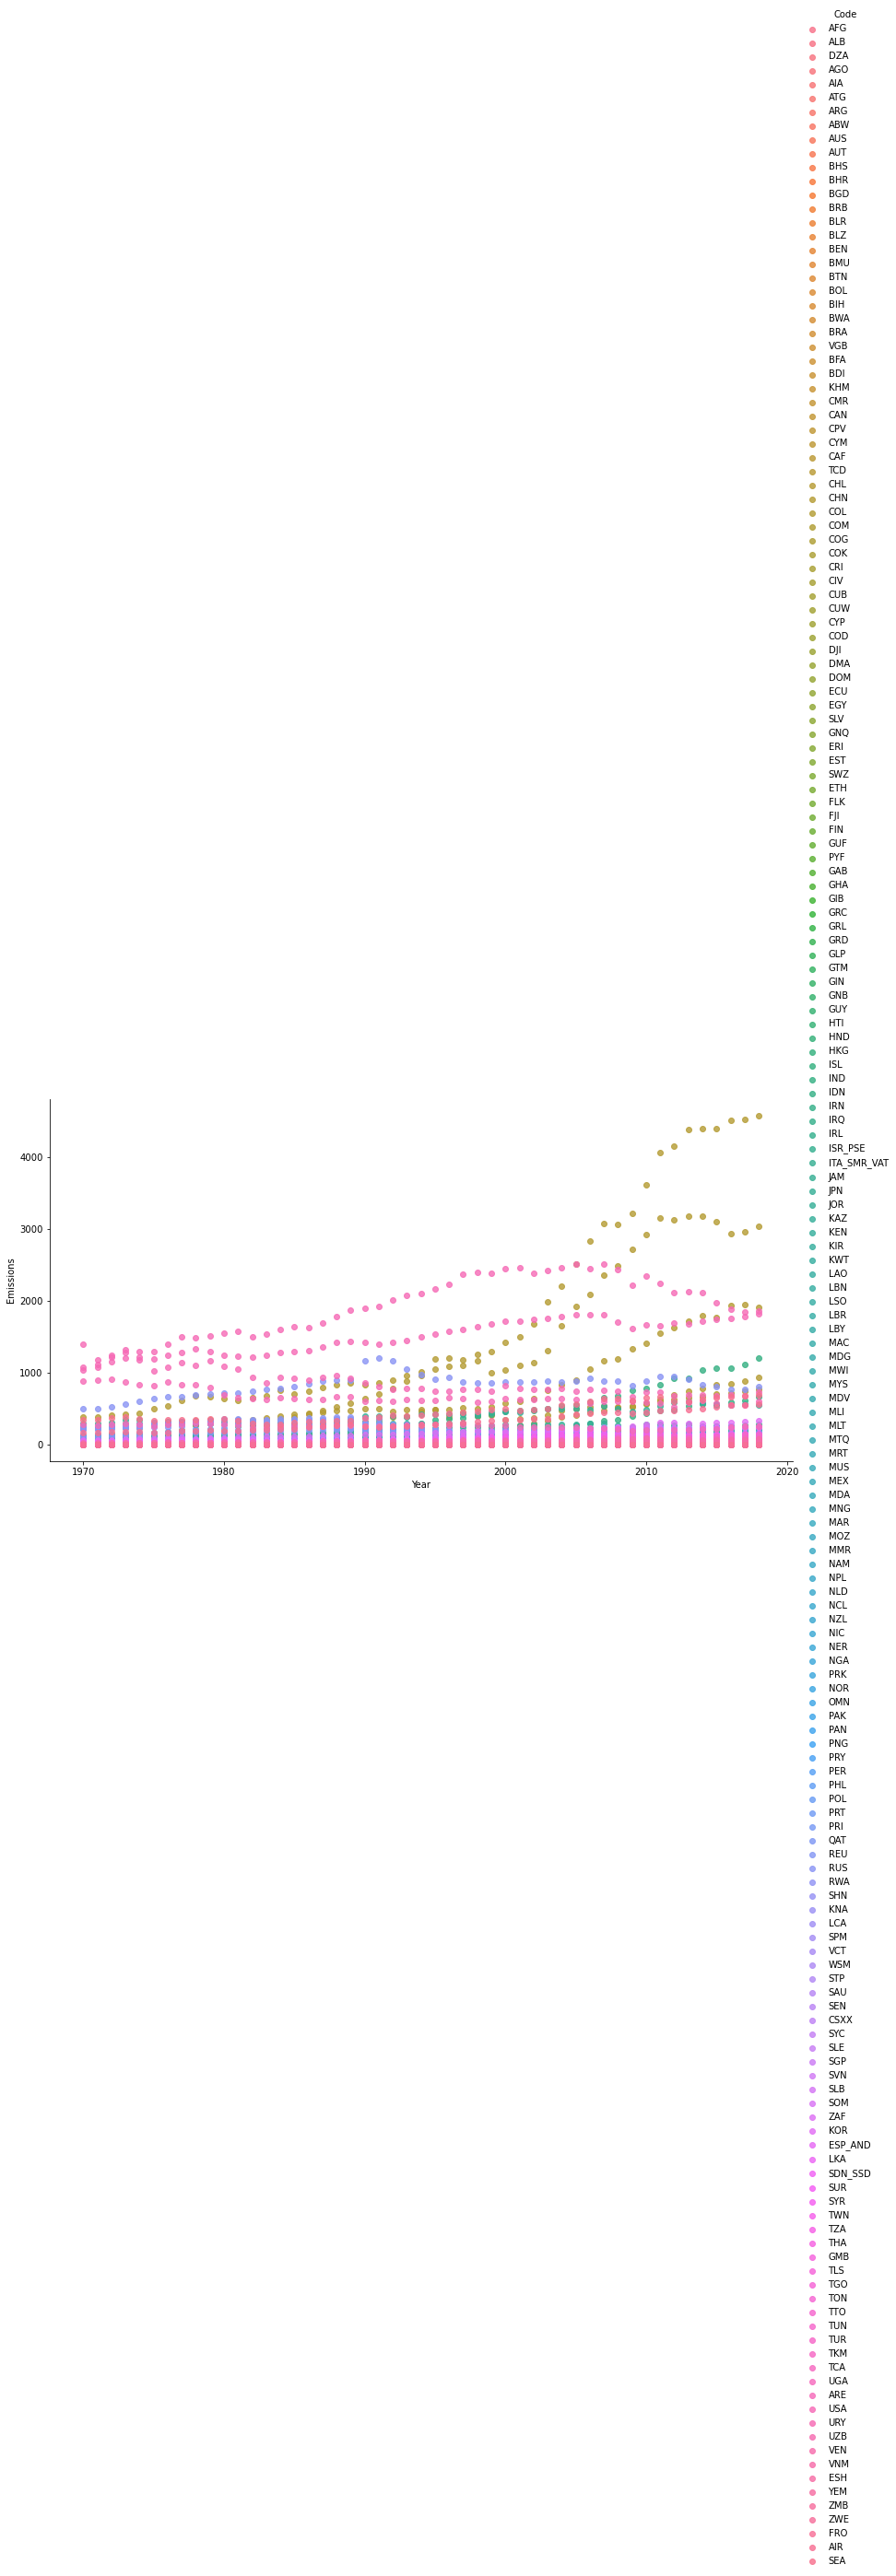

In [55]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=totalIncrease,fit_reg=False, height=6, aspect=2);
plt.show()

Plotting and looking at countries that are better off in 2018, again it seems that most countries are in a steady decrease as opposed to a drastic decrease.

<Figure size 1440x1440 with 0 Axes>

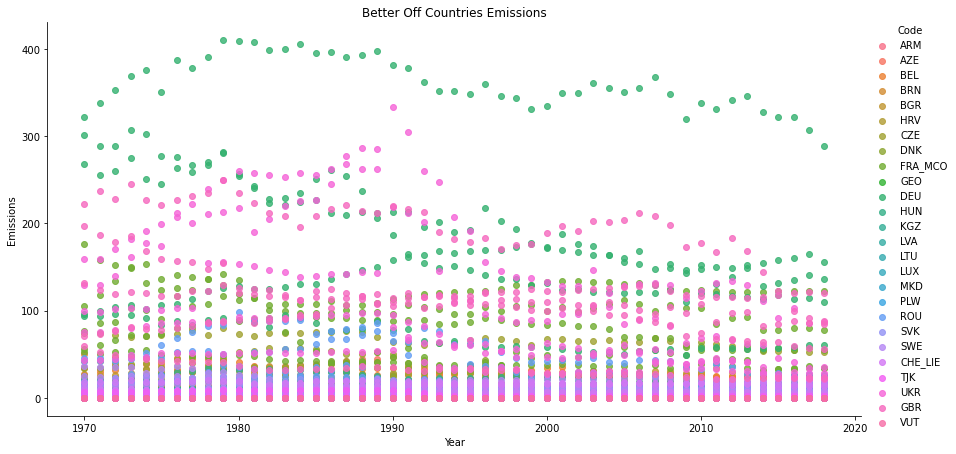

In [56]:
plt.figure(figsize=(20,20))
sns.lmplot(x='Year', y='Emissions',hue='Code',data=totalDecrease,fit_reg=False, height=6, aspect=2).set(title="Better Off Countries Emissions");
plt.show()

We now want to merge the two dataset and analyze how carbon emissions change over time with respect to each country's environmental policies.

Start by grouping the Edgar CO2 dataset by country and year then adding up the total carbon emissions for each 
particular year and country based on all of the sectors.

In [57]:
# changing column names for join
grouped = df.rename(columns = {'Name' : 'Country'}) 
grouped_co2_data = grouped.groupby(['Code', 'Year'])['Emissions'].agg('sum').reset_index()
grouped_co2_data.head()
# grouped_co2_data[grouped_co2_data['Code']=='USA'] -- test

,Code,Year,Emissions
0,ABW,1970,0.021293
1,ABW,1971,0.021306
2,ABW,1972,0.024495
3,ABW,1973,0.026774
4,ABW,1974,0.022339


Here we are grouping the policy dataset by country and year then counting how many policies have been passed for each 
particular year and country.

In [58]:
# grouping policy dataset

# renaming 'Date of decision' to 'Year' and 'Country ISO' to 'Code' to help with the join
grouped_policy = climate_policy_data.rename(columns = {'Date of decision':'Year'})
grouped_policy = grouped_policy.rename(columns = {'Country ISO':'Code'})

grouped_policy = grouped_policy.groupby(['Code', 'Year']).agg('count').reset_index()
grouped_policy.head(50)

,Code,Year,Policy name,Policy Title,Country,Sector name,Policy type,Policy objective
0,AFG,2015.0,1,1,1,1,1,1
1,AGO,2008.0,2,2,2,2,2,2
2,AGO,2010.0,2,2,2,0,0,2
3,AGO,2012.0,2,2,2,1,1,2
4,AGO,2013.0,1,1,1,0,0,1
5,AGO,2015.0,1,1,1,1,1,1
6,AGO,2020.0,1,1,1,1,1,1
7,ALB,2010.0,1,1,1,1,1,1
8,ALB,2015.0,1,1,1,1,1,1
9,AND,2020.0,1,1,1,1,1,1


Finally, we merge the two grouped datasets with an outer merge based on 'Code' and 'Year'.
We do an outer merge, because we want to merge by matching rows based on 'Code' and 'Year and at the
same time we still want to include unmatched rows that have either emissions or a climate policy, but not both.

In [59]:
merged_data = pd.merge(grouped_policy, grouped_co2_data, how = 'outer', on = ['Code', 'Year'])

# How many policy names is equivalent to the number of policies
merged_data = merged_data.rename(columns = {'Policy name':'Number of Policies'})

merged_data

,Code,Year,Number of Policies,Policy Title,Country,Sector name,Policy type,Policy objective,Emissions
0,AFG,2015.0,1.0,1.0,1.0,1.0,1.0,1.0,9.800058
1,AGO,2008.0,2.0,2.0,2.0,2.0,2.0,2.0,19.672835
2,AGO,2010.0,2.0,2.0,2.0,0.0,0.0,2.0,24.018474
3,AGO,2012.0,2.0,2.0,2.0,1.0,1.0,2.0,25.221763
4,AGO,2013.0,1.0,1.0,1.0,0.0,0.0,1.0,27.426121
...,...,...,...,...,...,...,...,...,...
10572,ZWE,2009.0,NaN,NaN,NaN,NaN,NaN,NaN,7.757873
10573,ZWE,2014.0,NaN,NaN,NaN,NaN,NaN,NaN,12.567990
10574,ZWE,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,11.472800
10575,ZWE,2017.0,NaN,NaN,NaN,NaN,NaN,NaN,12.812133


Drop columns in our merged dataframe:
1. Country is dropped due to Code being used.
2. Policy Title, Sector Name, Policy type, and Policy objective are dropped since, we are only looking at number of policies that year and these columns all originated from the climate policy dataset

In [60]:
# Drop remaining columns
merged_data = merged_data.drop(labels = ['Country', 'Policy Title', 'Sector name', 'Policy type', 'Policy objective'], axis = 1)

merged_data

,Code,Year,Number of Policies,Emissions
0,AFG,2015.0,1.0,9.800058
1,AGO,2008.0,2.0,19.672835
2,AGO,2010.0,2.0,24.018474
3,AGO,2012.0,2.0,25.221763
4,AGO,2013.0,1.0,27.426121
...,...,...,...,...
10572,ZWE,2009.0,NaN,7.757873
10573,ZWE,2014.0,NaN,12.567990
10574,ZWE,2016.0,NaN,11.472800
10575,ZWE,2017.0,NaN,12.812133


Any row with NaN for Number of Policies should be changed to 0. It just means that for that country at a certain year there was no climate policies passed but, there still could be emissions.

In [61]:
# Change NaN for Number of Policies to 0
merged_data['Number of Policies'] = merged_data['Number of Policies'].fillna(0)

merged_data

,Code,Year,Number of Policies,Emissions
0,AFG,2015.0,1.0,9.800058
1,AGO,2008.0,2.0,19.672835
2,AGO,2010.0,2.0,24.018474
3,AGO,2012.0,2.0,25.221763
4,AGO,2013.0,1.0,27.426121
...,...,...,...,...
10572,ZWE,2009.0,0.0,7.757873
10573,ZWE,2014.0,0.0,12.567990
10574,ZWE,2016.0,0.0,11.472800
10575,ZWE,2017.0,0.0,12.812133


Any row that contains NaN for Emissions should be dropped.
They need to be dropped since, that means that there is no Emissions data across time for that Code. 
Even if it did have number of policies, we are not able to compare number of policies to emissions.

Also, the amount of countries in this scenario is few in comparison to the entire dataset.

In [62]:
# Check the number of rows that have NaN for emissions in a specific year
merged_data[(merged_data['Emissions'].isnull() == True) & (merged_data['Year'] == 2015)]

,Code,Year,Number of Policies,Emissions
263,CHE,2015.0,1.0,NaN
479,ESP,2015.0,12.0,NaN
519,EUE,2015.0,4.0,NaN
556,FRA,2015.0,8.0,NaN
565,FSM,2015.0,1.0,NaN
729,ISR,2015.0,1.0,NaN
750,ITA,2015.0,1.0,NaN
866,LIE,2015.0,1.0,NaN
896,MCO,2015.0,1.0,NaN
956,MNE,2015.0,1.0,NaN


In [63]:
# Drop rows that contain NaN for Emissions
merged_data = merged_data.dropna(subset=['Emissions'])
merged_data

,Code,Year,Number of Policies,Emissions
0,AFG,2015.0,1.0,9.800058
1,AGO,2008.0,2.0,19.672835
2,AGO,2010.0,2.0,24.018474
3,AGO,2012.0,2.0,25.221763
4,AGO,2013.0,1.0,27.426121
...,...,...,...,...
10572,ZWE,2009.0,0.0,7.757873
10573,ZWE,2014.0,0.0,12.567990
10574,ZWE,2016.0,0.0,11.472800
10575,ZWE,2017.0,0.0,12.812133


## Correlation & Linear Regression Analysis

In [38]:
# reload climate policy data
climate_policy_data = pd.read_csv('./data/climate_policy_database_policies_export.csv')
climate_policy_data.head()

,Policy ID,Country ISO,Policy name,Policy Title,Jurisdiction,Supranational region,Country,Subnational region or state,City or local,Type of policy instrument,...,Start date of implementation,End date of implementation,High impact,Policy objective,Source or references,Impact indicators: comments,Impact indicators: name,Impact indicators: value,Impact indicators: base year,Impact indicators: target year
0,5244.0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,Country,NaN,United States of America,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,Mitigation,https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
1,5243.0,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Country,NaN,Bosnia and Herzegovina,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2020.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
2,5242.0,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,Country,NaN,"Macedonia, the former Yugoslav Republic of",NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
3,5241.0,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Country,NaN,Philippines,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
4,5240.0,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Country,NaN,Cape Verde,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN


In [39]:
# get nan sums of climate policy data
climate_policy_data.isna().sum()

Policy ID                            1
Country ISO                          0
Policy name                          0
Policy Title                         0
Jurisdiction                       406
Supranational region              4935
Country                              0
Subnational region or state       4982
City or local                     5082
Type of policy instrument          424
Sector name                        421
Policy description                1825
Policy type                        496
Policy stringency                 5014
Implementation state               425
Date of decision                   132
Start date of implementation      4557
End date of implementation        4385
High impact                        530
Policy objective                    60
Source or references               143
Impact indicators: comments       4759
Impact indicators: name           4716
Impact indicators: value          4716
Impact indicators: base year      4829
Impact indicators: target

In [44]:
climate_policy_data['Policy objective'].value_counts()

Mitigation                                                4241
Mitigation, Adaptation                                     204
Adaptation, Mitigation                                     101
Mitigation, Air pollution                                   79
Air pollution                                               66
                                                          ... 
Water                                                        1
Mitigation, Energy access, Water                             1
Mitigation, Energy security, Energy access, Adaptation       1
Adaptation, Energy access, Water                             1
Economic development, Mitigation, Adaptation                 1
Name: Policy objective, Length: 69, dtype: int64

In [ ]:
climate_policy_features = climate_policy_data[['County ISO', 'Jurisdiction', 'Start date of implementation', 
                                               'End date of implementation', 'High impact']]

In [40]:
climate_policy_data.dropna(axis=0, subset=['Start date of implementation', 'End date of implementation'])

,Policy ID,Country ISO,Policy name,Policy Title,Jurisdiction,Supranational region,Country,Subnational region or state,City or local,Type of policy instrument,...,Start date of implementation,End date of implementation,High impact,Policy objective,Source or references,Impact indicators: comments,Impact indicators: name,Impact indicators: value,Impact indicators: base year,Impact indicators: target year
0,5244.0,USA,Nationally Determined Contribution – NDC Unite...,Nationally Determined Contribution - NDC,Country,NaN,United States of America,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,Mitigation,https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
1,5243.0,BIH,Nationally Determined Contribution – NDC Bosni...,Nationally Determined Contribution - NDC,Country,NaN,Bosnia and Herzegovina,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2020.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
2,5242.0,MKD,Nationally Determined Contribution – NDC Maced...,Nationally Determined Contribution - NDC,Country,NaN,"Macedonia, the former Yugoslav Republic of",NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
3,5241.0,PHL,Nationally Determined Contribution – NDC Phili...,Nationally Determined Contribution - NDC,Country,NaN,Philippines,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
4,5240.0,CPV,Nationally Determined Contribution – NDC Cape ...,Nationally Determined Contribution - NDC,Country,NaN,Cape Verde,NaN,NaN,"Climate strategy, Political & non-binding clim...",...,2021.0,2030.0,Unknown,"Adaptation, Mitigation",https://www4.unfccc.int/sites/ndcstaging/Publi...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5052,1389.0,KOR,Greenhouse Gas Reduction Roadmap Republic of K...,Greenhouse Gas Reduction Roadmap,Country,NaN,Republic of Korea,NaN,NaN,Climate strategy,...,2014.0,2020.0,High,Mitigation,https://www.climate-laws.org/geographies/south...,"Building energy performance standard (MtCO2e),...",Building energy performance standard (kWh/ m2)...,"64.5, 32.7, 0.0986, 20.5, 0.0308, 29.3","0, 0, 0, 0, 0, 0","2030, 2030, 2030, 2030, 2030, 2030"
5058,2931.0,KOR,Transit Master Plan Republic of Korea,Transit Master Plan,Country,NaN,Republic of Korea,NaN,NaN,"Infrastructure investments, Strategic planning",...,2012.0,2016.0,Unknown,Mitigation,http://unfccc.int/resource/docs/natc/kornc3.pdf,NaN,NaN,NaN,NaN,NaN
5093,341.0,USA,Building Technologies Program United States of...,Building Technologies Program,Country,NaN,United States of America,NaN,NaN,"Regulatory Instruments, Advice or aid in imple...",...,2008.0,2012.0,Unknown,Mitigation,http://www.eere.energy.gov/buildings/,NaN,NaN,NaN,NaN,NaN
5097,1699.0,USA,Light-duty GHG emissions and fuel consumption ...,Light-duty GHG emissions and fuel consumption ...,Country,NaN,United States of America,NaN,NaN,"Sectoral standards, Vehicle fuel-economy and e...",...,2017.0,2025.0,High,Mitigation,http://www3.epa.gov/otaq/climate/regs-light-du...,Fuel efficiency standards for new light-duty v...,"Vehicle fuel consumption (km/l), Vehicle fuel ...","1.1, 0.91","2017, 2021","2021, 2025"


In [73]:
# only using 2018 to indicate total emissions produced
total_emissions = grouped_co2_data[grouped_co2_data['Year'] == 2018].sort_values(by='Code').reset_index()
del total_emissions['Year']

In [74]:
# calculating the total number of policies passed per country 
total_policies = pd.DataFrame(climate_policy_data['Country ISO'].value_counts()).reset_index()
total_policies.columns = ['Code','Total_policies']
total_policies

,Code,Total_policies
0,USA,434
1,CAN,265
2,AUS,228
3,FRA,192
4,DEU,190
...,...,...
189,ERI,1
190,STP,1
191,SOM,1
192,LCA,1


In [75]:
#merging the two
merged_total_data = pd.merge(total_policies,total_emissions,how='outer',on=['Code'])
merged_total_data

,Code,Total_policies,index,Emissions
0,USA,434.0,9750.0,5275.477845
1,CAN,265.0,1616.0,594.198154
2,AUS,228.0,538.0,415.309659
3,FRA,192.0,NaN,NaN
4,DEU,190.0,2547.0,752.654899
...,...,...,...,...
224,SHN,NaN,8280.0,0.017754
225,SPM,NaN,8525.0,0.079222
226,TCA,NaN,8966.0,0.170002
227,TWN,NaN,9505.0,284.550293


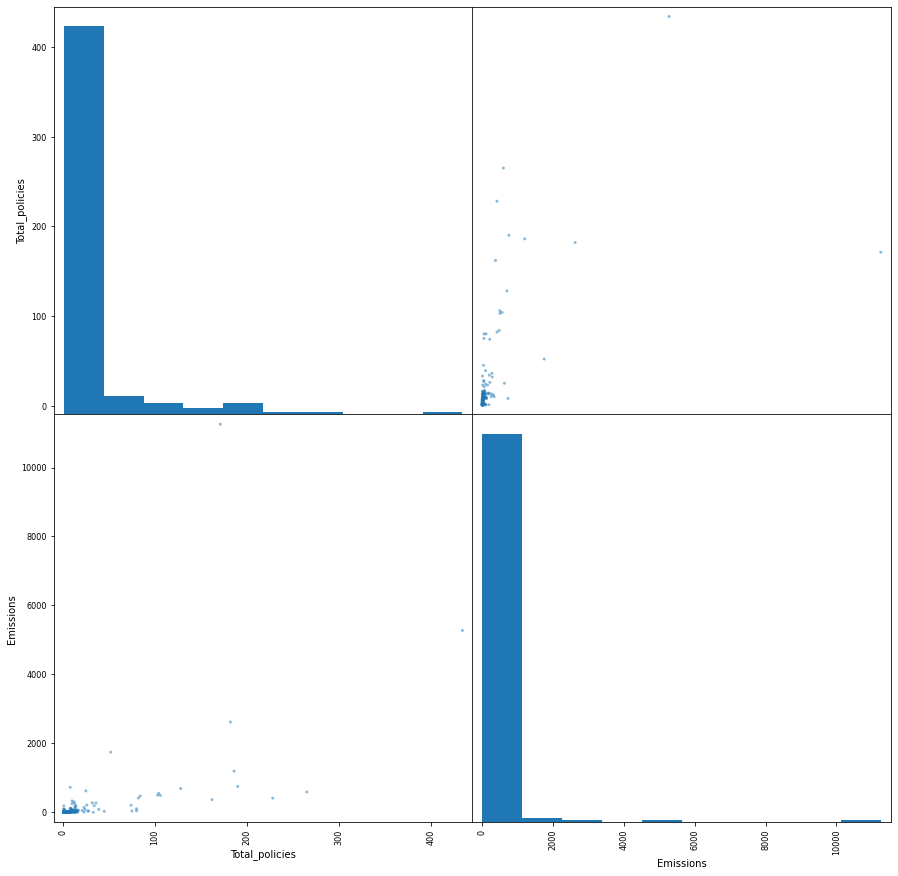

In [67]:
# Creating a scatter plot
temp_df = pd.DataFrame(merged_total_data, columns=['Total_policies','Emissions'])
fig = pd.plotting.scatter_matrix(temp_df,figsize = (15,15))

From the plot, it looks like a positive relationship. 

In [70]:
outcome, predictors = patsy.dmatrices('Emissions ~ Total_policies', merged_total_data)
mod = sm.OLS(outcome, predictors)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              Emissions   R-squared:                       0.328
Model:                            OLS   Adj. R-squared:                  0.325
Method:                 Least Squares   F-statistic:                     84.59
Date:                Tue, 08 Jun 2021   Prob (F-statistic):           1.16e-16
Time:                        23:45:58   Log-Likelihood:                -1416.5
No. Observations:                 175   AIC:                             2837.
Df Residuals:                     173   BIC:                             2843.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -40.1280     65.696     -0.

**Linear regression**

𝛽1=10.50 

**Correlation**

𝑅2=0.328

$R-squared$ ($R^2$) is equal to Pearson's correlation ($r$) squared.

**$R-squared$** is the percentage of the the $outcome$ variable variation that is explained by a linear model. It takes a value between 0 and 100%.

Here, 32.8% of the variation in emissions ($outcome$) is explained by the number of polices ($predictor$)


**Our p val is 0... i think that means the data is not normal**

**LOOKING AT TOP EMISSION PRODUCING COUNTRIES: RUSSIA**

In [71]:
countrycodes = ['RUS']
df_sub = merged_data[merged_data['Code'].isin(countrycodes)]
df_sub.reset_index()
df_sub.columns = ['Code','Year','Number_of_Policies','Emissions']

Text(-2.700000000000003, 0.5, 'Emissions')

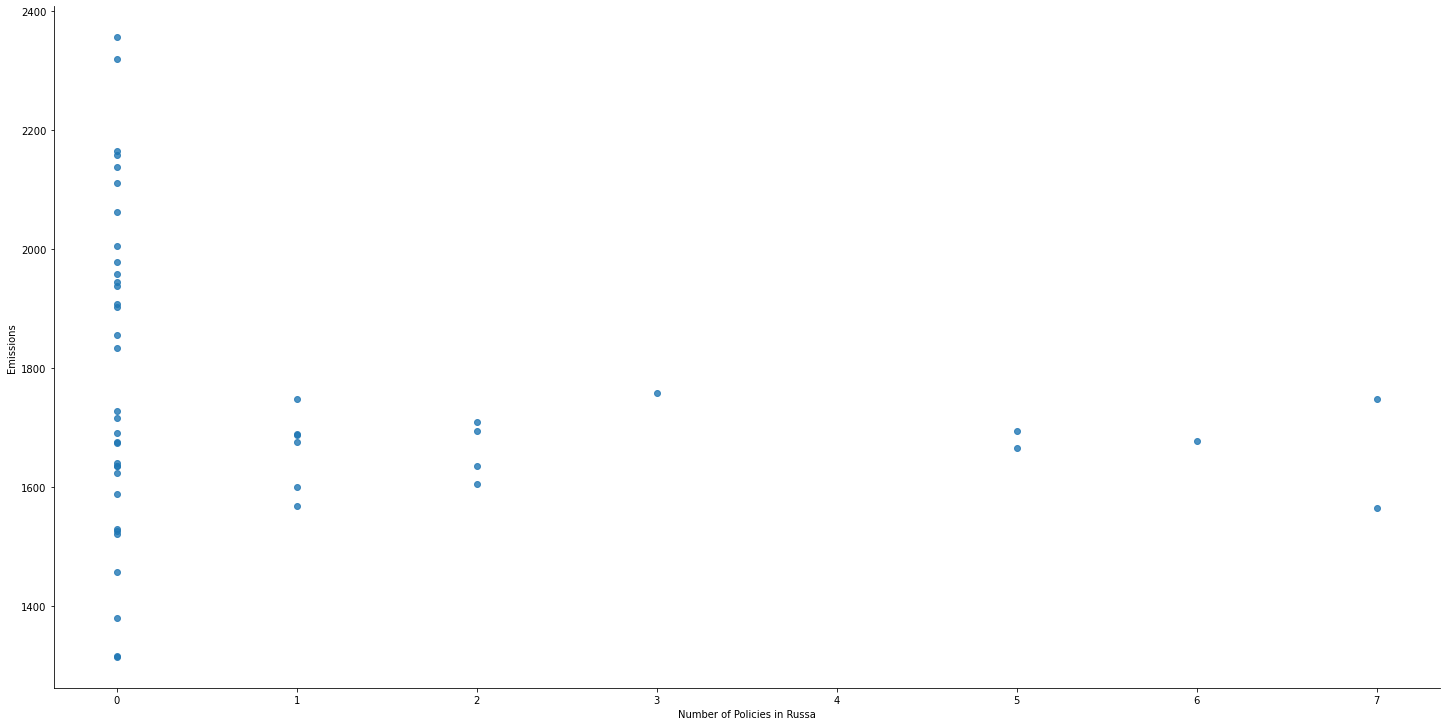

In [76]:
sns.lmplot(x = 'Number_of_Policies',
          y = 'Emissions',
           scatter= True,
          data = df_sub,
          fit_reg = False,
          height = 10,
          aspect = 2)
plt.xlabel('Number of Policies in Russa')
plt.ylabel('Emissions')

The above dataset is the final form of the merged climate policy and emissions dataset. It is clean of NaNs.

## Geospatial Analysis:

Let's check how the policies per capita is.

First, get the Codes and their respective Number of Policies.

In [64]:
temp_merged = merged_data
temp_merged = temp_merged.groupby(['Code'])['Number of Policies'].agg('sum').reset_index()
temp_merged.head()

,Code,Number of Policies
0,ABW,0.0
1,AFG,1.0
2,AGO,8.0
3,AIA,0.0
4,AIR,0.0


Get dataset of the world from geopandas.

In [65]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

# Statements used to double check the merged dataframes
#print(df[(df['Code'] == 'AFG') & (df['Year'] ==  1970)]['Emissions'].sum())
#df[(df['Code'] ==  'SRB')]['Emissions']
#climate_policy_data[(climate_policy_data['Country ISO'] == 'USA') & (climate_policy_data['Date of decision'] == 2012) ]
#grouped_policy[(grouped_policy['Country'] == 'United States of America')]
#merged_data[(merged_data['Code'] == 'SRB')]
#merged_data[(merged_data['Emissions'].isnull() == True) & (merged_data['Year'] == 2015)]

In [66]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Rename 'iso_a3' column of world as 'Code' in order to merge it with our temp_merged containing each Code and its respective number of policies.

In [67]:
world = world.rename(columns={'iso_a3':'Code'})
world

,pop_est,continent,name,Code,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


Merge our world dataset with our temp_merged.

In [68]:
geo_data = pd.merge(world, temp_merged, how = 'left', on = ['Code'])
geo_data

,pop_est,continent,name,Code,gdp_md_est,geometry,Number of Policies
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3.0
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",15.0
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.0
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",255.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",418.0
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",6.0


Create new column in our world dataset called 'policies_per_cap' by calculating the policies per capita from our geo_data.

In [69]:
world['policies_per_cap'] = geo_data['Number of Policies'] / geo_data['pop_est']
world

,pop_est,continent,name,Code,gdp_md_est,geometry,policies_per_cap
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3.257548e-06
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.780304e-07
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.000000e+00
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.158160e-06
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.279752e-06
...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",4.925267e-06


Plot our figure:

<AxesSubplot:>

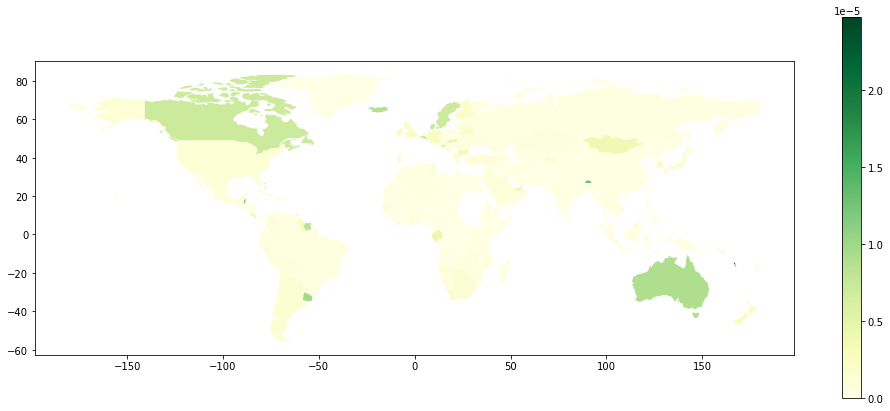

In [70]:
fix, ax = plt.subplots(1,1, figsize=(17,7))

world.plot(column='policies_per_cap', ax=ax, cmap='YlGn', legend=True)

This choropleth indicates the countries which have a high number of policies relative to their population. 

Next, we'll look at how emissions have changed worldwide from 2000 to 2018. We start with visualizing emissions per capita in 2000 as a starting point in order to use the same population data for each year since each country's population won't differ too significantly in this time period. 

In [71]:
#trying to compare emissions from 2000 to 2018 using choropleth
#creating dataset with world data and emissions data
dummy_merged = merged_data
emissions = pd.merge(world, dummy_merged, how = 'left', on = 'Code')
emissions

,pop_est,continent,name,Code,gdp_md_est,geometry,policies_per_cap,Year,Number of Policies,Emissions
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.000003,2006.0,1.0,2.108071
1,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.000003,2012.0,1.0,2.093770
2,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.000003,2015.0,1.0,1.220712
3,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.000003,1970.0,0.0,0.779253
4,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",0.000003,1971.0,0.0,0.788441
...,...,...,...,...,...,...,...,...,...,...
7900,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.000005,2015.0,0.0,36.356837
7901,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.000005,2016.0,0.0,35.944218
7902,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.000005,2017.0,0.0,35.976914
7903,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.000005,2018.0,0.0,35.950703


Get the emissions dataframe to only have rows from year 2000.

In [82]:
emissions_2000 = emissions[emissions['Year'] == 2000].reset_index()
emissions_2000

,index,pop_est,continent,name,Code,gdp_md_est,geometry,policies_per_cap,Year,Number of Policies,Emissions
0,33,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3.257548e-06,2000.0,0.0,1.143783
1,49,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.780304e-07,2000.0,1.0,3.094097
2,128,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.000000e+00,2000.0,0.0,0.206481
3,156,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.158160e-06,2000.0,11.0,557.725045
4,218,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.279752e-06,2000.0,17.0,5915.630723
...,...,...,...,...,...,...,...,...,...,...,...
156,7657,39570125,Africa,Uganda,UGA,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",3.285307e-07,2000.0,1.0,1.168306
157,7705,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",6.721851e-07,2000.0,1.0,0.618851
158,7787,3856181,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",1.037296e-06,2000.0,0.0,14.329200
159,7835,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",1.426045e-06,2000.0,0.0,9.045073


In [83]:
#dividing by population to get a choropleth
emissions_2000['emissions_per_capita'] = emissions_2000['Emissions'] / emissions_2000['pop_est']
emissions_2000

,index,pop_est,continent,name,Code,gdp_md_est,geometry,policies_per_cap,Year,Number of Policies,Emissions,emissions_per_capita
0,33,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",3.257548e-06,2000.0,0.0,1.143783,1.241976e-06
1,49,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2.780304e-07,2000.0,1.0,3.094097,5.735020e-08
2,128,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",0.000000e+00,2000.0,0.0,0.206481,3.422785e-07
3,156,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7.158160e-06,2000.0,11.0,557.725045,1.565602e-05
4,218,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",1.279752e-06,2000.0,17.0,5915.630723,1.811134e-05
...,...,...,...,...,...,...,...,...,...,...,...,...
156,7657,39570125,Africa,Uganda,UGA,84930.0,"POLYGON ((33.90371 -0.95000, 31.86617 -1.02736...",3.285307e-07,2000.0,1.0,1.168306,2.952496e-08
157,7705,11901484,Africa,Rwanda,RWA,21970.0,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",6.721851e-07,2000.0,1.0,0.618851,5.199778e-08
158,7787,3856181,Europe,Bosnia and Herz.,BIH,42530.0,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",1.037296e-06,2000.0,0.0,14.329200,3.715904e-06
159,7835,2103721,Europe,Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",1.426045e-06,2000.0,0.0,9.045073,4.299559e-06


Graph the choropleth for emissions_per_capita

<AxesSubplot:>

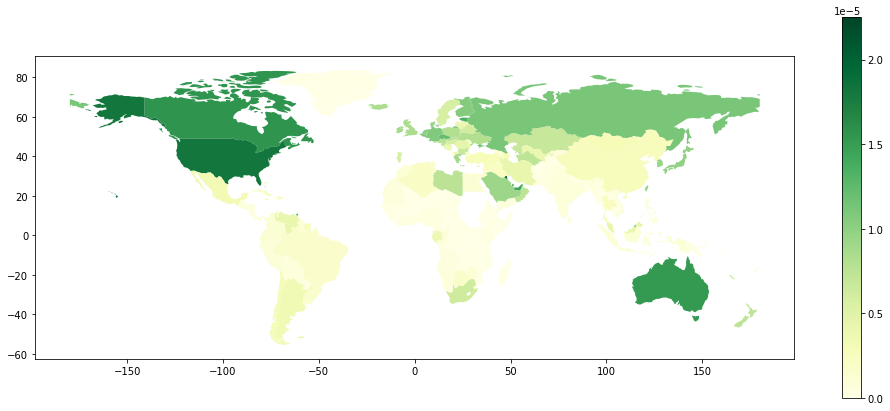

In [77]:
#initializing min and max for both choropleth
norm = mpl.colors.Normalize(vmin = 0, vmax = 2.25e-5)

fix, ax = plt.subplots(1,1, figsize=(17,7))
emissions_2000.plot(column='emissions_per_capita', ax=ax, cmap='YlGn', legend=True, norm=norm)

Now we will look at emissions per capita from 2018.
Repeat the same steps done above to acquire the choropleth for 2018.

<AxesSubplot:>

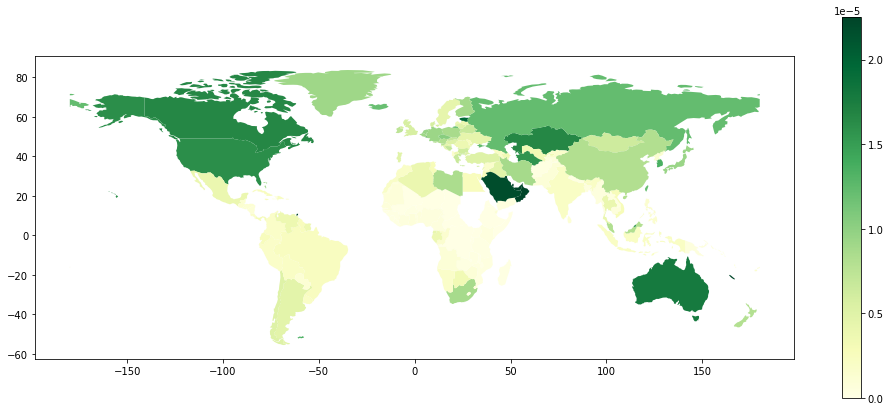

In [84]:
#creating 2018 emissions subset
emissions_2018 = emissions[emissions['Year'] == 2018].reset_index()
emissions_2018['emissions_per_capita'] = emissions_2018['Emissions']/emissions_2018['pop_est']
fix, ax = plt.subplots(1,1, figsize=(17,7))
emissions_2018.plot(column='emissions_per_capita', ax=ax, cmap='YlGn', legend=True, norm=norm)

It is clear from the difference between the choropleths of emissions from 2000 and 2018 that there are more emissions per capita in many countries. In particular, we can observe that both Canada and Australia, two countries among the highest in climate policies per capita, have both increased in emissions per capita during this period. The general trend deduced from these visualizations is that even among some of the world's most active countries in fighting climate change, we still see overall emissions per capita rise significantly over the last 20 years.

# Ethics & Privacy

**Instructions: Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out Deon's Ethics Checklist. In particular:**

**Are there any biases/privacy/terms of use issues with the data you propsed?
Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
How will you handle issues you identified?**





In order to uphold ethics and privacy, we must ensure that our data does not contain any harmful biases and that our resulting subsequent analysis does not further such harmful biases. While our intentions may not be malicious, we must still be vigilant of any harmful practices that may occur unknowingly throughout our project. Furthermore, we should always consider the risks of using certain data sets. We want to make sure that the data we work with is substantial enough to make reliable inferences. Doing so would result in inaccurate predictions and spurious correlations. If we are not able to find sufficient data, we will need to consider changing our research. 


For our two datasets, there is little indication of any biases. The climate policy dataset is objective in that it lists all climate policies, both opened and closed, from 1970 to 2018. It also includes all country codes indicating that it does not exclude any particular populations. We retrieved the climate policy dataset from the Climate Policy Database which aims to establish an "open and collaborative platform" to gather and retrieve data. Therefore, there seems to be little bias in the type of information we used in our project. 

For the EDGAR CO2 emissions dataset, there is little bias. It provides emission data for every country code and therefore does not exclude any populations. EDGAR provides "idependent" emission information regardless of reports by European Member states of parties under the UNFCCC. Their collection methodology is made transparent and is applied to all countries. 

It is notable that we did only consider the top **X** emission producing countries in our analysis. Our EDA indicated that many countries did not product significant amounts of carbon emissions which in turn affects the number of climate policies implemented throughout the years. 

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*